<a href="https://colab.research.google.com/github/fizmat/compare_gpu_lib/blob/master/comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library setup

In [93]:
!apt install -y --no-install-recommends -q nvidia-cuda-toolkit

Reading package lists...
Building dependency tree...
Reading state information...
nvidia-cuda-toolkit is already the newest version (9.1.85-3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 3 not upgraded.


In [94]:
!nvcc --version
!nvidia-smi


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Tue_Jun_12_23:07:04_CDT_2018
Cuda compilation tools, release 9.2, V9.2.148
Tue Nov  6 12:58:52 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    56W / 149W |    196MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+--

In [95]:
!apt-get install lshw clinfo

Reading package lists... Done
Building dependency tree       
Reading state information... Done
clinfo is already the newest version (2.2.18.03.26-1).
lshw is already the newest version (02.18-0.1ubuntu6.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 3 not upgraded.


In [96]:
!lshw -numeric -C display

  *-display
       description: 3D controller
       product: GK210GL [Tesla K80] [10DE:102D]
       vendor: NVIDIA Corporation [10DE]
       physical id: 4
       bus info: pci@0000:00:04.0
       version: a1
       width: 64 bits
       clock: 33MHz
       capabilities: msi pm bus_master cap_list
       configuration: driver=nvidia latency=0
       resources: iomemory:40-3f iomemory:80-7f irq:33 memory:fc000000-fcffffff memory:400000000-7ffffffff memory:800000000-801ffffff ioport:c000(size=128)


In [97]:
!clinfo

Number of platforms                               1
  Platform Name                                   NVIDIA CUDA
  Platform Vendor                                 NVIDIA Corporation
  Platform Version                                OpenCL 1.2 CUDA 9.2.176
  Platform Profile                                FULL_PROFILE
  Platform Extensions                             cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_copy_opts cl_nv_create_buffer
  Platform Extensions function suffix             NV

  Platform Name                                   NVIDIA CUDA
Number of devices                                 1
  Device Name                                     Tesla K80
  Device Vendor                                   NVIDIA Corporation
  Device Vendor 

In [98]:
# https://stackoverflow.com/questions/48811248/how-to-use-numba-in-colaboratory
# https://stackoverflow.com/questions/48385686/cuda-library-nvvm-not-found
!pip install numba
import os
os.environ['NUMBAPRO_LIBDEVICE'] = "/usr/lib/nvidia-cuda-toolkit/libdevice"
os.environ['NUMBAPRO_NVVM'] = "/usr/lib/x86_64-linux-gnu/libnvvm.so"



In [99]:
from numba import cuda as ncuda
print(ncuda.gpus)

<Managed Device 0>


In [100]:
!pip install pycuda

In [101]:
import pycuda.autoinit
import pycuda.driver as cuda
from pprint import pprint
from pycuda.compiler import SourceModule
(free,total)=cuda.mem_get_info()
print(free, total)
print( "Global memory occupancy: {}% free".format( free * 100 / total ) )

for devicenum in range( cuda.Device.count() ):
  device = cuda.Device( devicenum )
  attrs = device.get_attributes()
  pprint(attrs)


11790647296 11996954624
Global memory occupancy: 98.2803358480053% free
{pycuda._driver.device_attribute.MAX_THREADS_PER_BLOCK: 1024,
 pycuda._driver.device_attribute.MAX_BLOCK_DIM_X: 1024,
 pycuda._driver.device_attribute.MAX_BLOCK_DIM_Y: 1024,
 pycuda._driver.device_attribute.MAX_BLOCK_DIM_Z: 64,
 pycuda._driver.device_attribute.MAX_GRID_DIM_X: 2147483647,
 pycuda._driver.device_attribute.MAX_GRID_DIM_Y: 65535,
 pycuda._driver.device_attribute.MAX_GRID_DIM_Z: 65535,
 pycuda._driver.device_attribute.MAX_SHARED_MEMORY_PER_BLOCK: 49152,
 pycuda._driver.device_attribute.TOTAL_CONSTANT_MEMORY: 65536,
 pycuda._driver.device_attribute.WARP_SIZE: 32,
 pycuda._driver.device_attribute.MAX_PITCH: 2147483647,
 pycuda._driver.device_attribute.MAX_REGISTERS_PER_BLOCK: 65536,
 pycuda._driver.device_attribute.CLOCK_RATE: 823500,
 pycuda._driver.device_attribute.TEXTURE_ALIGNMENT: 512,
 pycuda._driver.device_attribute.GPU_OVERLAP: 1,
 pycuda._driver.device_attribute.MULTIPROCESSOR_COUNT: 13,
 pycuda.

In [102]:
!pip install pyopencl==2016.1

In [103]:
import pyopencl as cl  # Import the OpenCL GPU computing API
import pyopencl.array as cl_array

print('\n' + '=' * 60 + '\nOpenCL Platforms and Devices')
for platform in cl.get_platforms():  # Print each platform on this computer
    print('=' * 60)
    print('Platform - Name:  ' + platform.name)
    print('Platform - Vendor:  ' + platform.vendor)
    print('Platform - Version:  ' + platform.version)
    print('Platform - Profile:  ' + platform.profile)
    for device in platform.get_devices():  # Print each device per-platform
        print('    ' + '-' * 56)
        print('    Device - Name:  ' + device.name)
        print('    Device - Type:  ' + cl.device_type.to_string(device.type))
        print('    Device - Max Clock Speed:  {0} Mhz'.format(device.max_clock_frequency))
        print('    Device - Compute Units:  {0}'.format(device.max_compute_units))
        print('    Device - Local Memory:  {0:.0f} KB'.format(device.local_mem_size/1024))
        print('    Device - Constant Memory:  {0:.0f} KB'.format(device.max_constant_buffer_size/1024))
        print('    Device - Global Memory: {0:.0f} GB'.format(device.global_mem_size/1073741824.0))
print('\n')



OpenCL Platforms and Devices
Platform - Name:  NVIDIA CUDA
Platform - Vendor:  NVIDIA Corporation
Platform - Version:  OpenCL 1.2 CUDA 9.2.176
Platform - Profile:  FULL_PROFILE
    --------------------------------------------------------
    Device - Name:  Tesla K80
    Device - Type:  GPU
    Device - Max Clock Speed:  823 Mhz
    Device - Compute Units:  13
    Device - Local Memory:  48 KB
    Device - Constant Memory:  64 KB
    Device - Global Memory: 11 GB




# Common functions

In [0]:
import numpy as np
import math
from collections import namedtuple
from time import perf_counter

Data = namedtuple('Particles', 'charges masses pos vel')


def gen_pos(n, size):
  steps = math.ceil(math.sqrt(n))
  full_grid = np.mgrid[0:steps, 0:steps].reshape(2, steps*steps).transpose()
  n_grid_points = np.ascontiguousarray(full_grid[:n])
  return size/steps * (n_grid_points+0.5)

def gen_vel(n, max_vel):
  return (np.random.rand(n, 2) - 0.5)*max_vel

def simulate(sim_batch, size, dt, time_steps, save_step, n, dev_data):
  batches = [save_step]*(time_steps//save_step) + [time_steps%save_step]
  t = 0
  for batch in batches:
    if batch==0: # skip last (remainder) batch if it's not needed
      continue 
    host_data = sim_batch(size, dt, batch, n, dev_data)
    t += batch;
    yield (t, t*dt, perf_counter(), host_data)

def batcher(to_host, step):
  def batch(size, dt, batch, n, dev_data):
    for t in range(batch):
      step(size, dt, n, dev_data)
    return to_host(n, dev_data)
  return batch


In [0]:
import pandas as pd

def to_device_arrays(to_device):
  return lambda data: Data(*(to_device(x) for x in data))
  
def to_device_values(to_device):
  return lambda data: Data(data[0], data[1], to_device(data[2]), to_device(data[3]))

def to_host_arrays(to_host):
  return lambda n, data: Data(to_host(n, data[0]), to_host(n, data[1]), to_host((n, 2), data[2]), to_host((n, 2), data[3]))

def to_host_values(to_host):
  return lambda n, data: Data(data[0], data[1], to_host(n, data[2]), to_host(n, data[3]))

def make_runner(batch, to_device_data, gen_all_data, dtype):
  def run(scale, time_steps, save_step):
    dist = 10.0
    n = scale*scale
    size = dist * scale
    max_vel = 1.0
    dt = 0.005
    mass = 2
    charge = 1
    data = gen_all_data(n, size, max_vel, charge, mass)
    dev_data = to_device_data(data)
    yield 0, 0.0, perf_counter(), data
    for t, time, perf, result in simulate(batch, dtype(size), dtype(dt), time_steps, save_step, np.int32(n), dev_data):
      yield t, time, perf, result
  return run


In [0]:
def gen_arrays_double(n, size, max_vel, charge, mass):
  pos = gen_pos(n, size).astype(np.float64)
  vel = gen_vel(n, max_vel).astype(np.float64)
  charges = np.full(n, charge, np.float64)
  masses = np.full(n, mass, np.float64)
  return Data(charges, masses, pos, vel)

def gen_arrays_float(n, size, max_vel, charge, mass):
  pos = gen_pos(n, size).astype(np.float32)
  vel = gen_vel(n, max_vel).astype(np.float32)
  charges = np.full(n, charge, np.float32)
  masses = np.full(n, mass, np.float32)
  return Data(charges, masses, pos, vel)

def gen_arrays_int(n, size, max_vel, charge, mass):
  pos = gen_pos(n, size).astype(np.float32)
  vel = gen_vel(n, max_vel).astype(np.float32)
  charges = np.full(n, charge).astype(np.int32)
  masses = np.full(n, mass).astype(np.int32)
  return Data(charges, masses, pos, vel)

def gen_value_float(n, size, max_vel, charge, mass):
  pos = gen_pos(n, size).astype(np.float32)
  vel = gen_vel(n, max_vel).astype(np.float32)
  charges = np.float32(mass)
  masses = np.float32(mass)
  return Data(charges, masses, pos, vel)

def gen_value_int(n, size, max_vel, charge, mass):
  pos = gen_pos(n, size).astype(np.float32)
  vel = gen_vel(n, max_vel).astype(np.float32)
  charges = np.int32(mass)
  masses = np.int32(mass)
  return Data(charges, masses, pos, vel)


In [0]:
def test(runner, scale=16):
  frame = pd.DataFrame(runner(scale, 20000, 5000), columns=["t", "time", "perf", "data"])
  multi_particles(frame)
  multi_maxwell(frame)
  return frame

In [0]:
import math
import matplotlib.pyplot as plt
from scipy.stats import rayleigh, norm

def plot_maxwell(vel, label=None):
  speed = (vel*vel).sum(1)**0.5
  plt.hist(speed, 20, normed=True)
  loc, scale = rayleigh.fit(speed, floc=0)
  dist = rayleigh(scale=scale)
  x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 1000)
  plt.plot(x, dist.pdf(x), label=label)
  if label:
    plt.legend()

def plot_maxwell_x(vel, label=None):
  plt.hist(vel[:, 0], 20, normed=True)
  loc, scale = norm.fit(vel[:, 0], floc=0)
  dist = norm(scale=scale)
  x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 1000)
  plt.plot(x, dist.pdf(x), label=label)
  if label:
    plt.legend()
  
def plot_particles(pos, vel):
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.quiver(pos[:, 0], pos[:, 1], vel[:, 0], vel[:, 1])

def multi_particles(f, n=5):
  plt.figure(figsize=(4.5*n, 4))
  for i in range(n):
    plt.subplot(1, n, i+1)
    j = i*len(f.data)//n
    plt.title(f"t = {f.time[j]}")
    r = f.data[j]
    plot_particles(r.pos, r.vel)

def multi_maxwell(f, n=None, width=20):
  if n is None:
    n = len(f.data)
  plt.figure(figsize=(width, 2*n))
  max_vel = max((r.vel*r.vel).sum(1).max() for r in f.data)**0.5
  max_x = max((np.abs(r.vel[:,0])).max() for r in f.data)
  for i in range(n):
    j = i*len(f.data)//n
    plt.subplot(n, 2, 2*i+1)
#     plt.title(f"t = {f.time[j]}")
    plt.xlim(0, max_vel)
    r = f.data[j]
    plot_maxwell(r.vel, f"t = {f.time[j]}")
    plt.subplot(n, 2, 2*i+2)
#     plt.title(f.data.index[j])
    plt.xlim(-max_x, max_x)
    plot_maxwell_x(r.vel, f"t = {f.time[j]}")


# Numba

## functions

In [0]:
def numba_to_host(shape, dev_array):
  return dev_array.copy_to_host()

def numba_to_device(host_array):
  return ncuda.to_device(host_array)

def numba_compound_step(update_v, update_p, rebound, threadsperblock=64):
  def step(size, dt, n, dev_data):
    dd = dev_data
    blockspergrid = math.ceil(n / threadsperblock)
    update_v[blockspergrid, threadsperblock](dt, dd.charges, dd.masses, dd.pos, dd.vel)
    update_p[blockspergrid, threadsperblock](dt, dd.pos, dd.vel)
    rebound[blockspergrid, threadsperblock](size, dd.pos, dd.vel)
  return step

def numba_simple_step(update, threadsperblock=64):
  def step(size, dt, n, dev_data):
    dd = dev_data
    blockspergrid = math.ceil(n / threadsperblock)
    update[blockspergrid, threadsperblock](dt, size, dd.charges, dd.masses, dd.pos, dd.vel)
  return step


In [0]:
@ncuda.jit
def numba_update_v(dt, charges, masses, pos, vel):
  pi = ncuda.grid(1)
  n = pos.size/2
  if pi < n:
    for pj in range(n):
      if pi != pj:
        # supposed to be 1 / r
        epsilon = type(pos[0, 0])(0.0001)
        diff0 = pos[pj, 0] - pos[pi, 0]
        diff1 = pos[pj, 1] - pos[pi, 1]
        dist = math.sqrt(diff0**2 + diff1**2)
        diff0 = diff0 / dist
        diff1 = diff1 / dist
        dist = max(epsilon, dist)
        f0 = - charges[pi] * charges[pj] * diff0 / dist**2
        f1 = - charges[pi] * charges[pj] * diff1 / dist**2
        vel[pi, 0] += f0 / masses[pi] * dt
        vel[pi, 1] += f1 / masses[pi] * dt

@ncuda.jit
def numba_update_p(dt, pos, vel):
  x = ncuda.grid(1)
  n = pos.size/2
  if x < n:
    for d in (0,1):
      pos[x, d] = pos[x, d] + vel[x, d] * dt

@ncuda.jit
def numba_rebound(size, pos, vel):
  p = ncuda.grid(1)
  n = pos.size/2
  if p < n:
    for d in (0, 1):
      if pos[p, d] < 0:
        pos[p, d] = -pos[p, d]
        vel[p, d] = -vel[p, d]
      if pos[p, d] > size:
        pos[p, d] = size - (pos[p, d] - size)
        vel[p, d] = -vel[p, d]

In [0]:
@ncuda.jit
def numba_update_v_t(dt, charges, masses, pos, vel):
  pi = ncuda.grid(1)
  n = pos.size/2
  if pi < n:
    for pj in range(n):
      if pi != pj:
        # supposed to be 1 / r
        epsilon = type(pos[0, 0])(0.0001)
        diff0 = pos[0, pj] - pos[0, pi]
        diff1 = pos[1, pj] - pos[1, pi]
        dist = math.sqrt(diff0**2 + diff1**2)
        diff0 = diff0 / dist
        diff1 = diff1 / dist
        dist = max(epsilon, dist)
        f0 = - charges[pi] * charges[pj] * diff0 / dist**2
        f1 = - charges[pi] * charges[pj] * diff1 / dist**2
        vel[0, pi] += f0 / masses[pi] * dt
        vel[1, pi] += f1 / masses[pi] * dt

@ncuda.jit
def numba_update_p_t(dt, pos, vel):
  x = ncuda.grid(1)
  n = pos.size/2
  if x < n:
    for d in (0,1):
      pos[d, x] = pos[d, x] + vel[d, x] * dt

@ncuda.jit
def numba_rebound_t(size, pos, vel):
  p = ncuda.grid(1)
  n = pos.size/2
  if p < n:
    for d in (0, 1):
      if pos[d, p] < 0:
        pos[d, p] = -pos[d, p]
        vel[d, p] = -vel[d, p]
      if pos[d, p] > size:
        pos[d, p] = size - (pos[d, p] - size)
        vel[d, p] = -vel[d, p]

In [0]:
@ncuda.jit
def numba_racing_update(dt, size, charges, masses, pos, vel):
  pi = ncuda.grid(1)
  n = pos.size/2
  if pi < n:
    for pj in range(n):
      if pi != pj:
        # supposed to be 1 / r
        epsilon = type(pos[0, 0])(0.0001)
        diff0 = pos[pj, 0] - pos[pi, 0]
        diff1 = pos[pj, 1] - pos[pi, 1]
        dist = math.sqrt(diff0**2 + diff1**2)
        diff0 = diff0 / dist
        diff1 = diff1 / dist
        dist = max(epsilon, dist)
        f0 = - charges[pi] * charges[pj] * diff0 / dist**2
        f1 = - charges[pi] * charges[pj] * diff1 / dist**2
        vel[pi, 0] += f0 / masses[pi] * dt
        vel[pi, 1] += f1 / masses[pi] * dt
    for d in (0, 1):
      pos[pi, d] = pos[pi, d] + vel[pi, d] * dt
      if pos[pi, d] < 0:
        pos[pi, d] = -pos[pi, d]
        vel[pi, d] = -vel[pi, d]
      if pos[pi, d] > size:
        pos[pi, d] = size - (pos[pi, d] - size)
        vel[pi, d] = -vel[pi, d]

In [0]:
@ncuda.jit
def numba_racing_scalar_update(dt, size, charge, mass, pos, vel):
  pi = ncuda.grid(1)
  n = pos.size/2
  if pi < n:
    for pj in range(n):
      if pi != pj:
        # supposed to be 1 / r
        epsilon = type(pos[0, 0])(0.0001)
        diff0 = pos[pj, 0] - pos[pi, 0]
        diff1 = pos[pj, 1] - pos[pi, 1]
        dist = math.sqrt(diff0**2 + diff1**2)
        diff0 = diff0 / dist
        diff1 = diff1 / dist
        dist = max(epsilon, dist)
        f0 = - charge * charge * diff0 / dist**2
        f1 = - charge * charge * diff1 / dist**2
        vel[pi, 0] += f0 / mass * dt
        vel[pi, 1] += f1 / mass * dt
    for d in (0,1):
      pos[pi, d] = pos[pi, d] + vel[pi, d] * dt
      if pos[pi, d] < 0:
        pos[pi, d] = -pos[pi, d]
        vel[pi, d] = -vel[pi, d]
      if pos[pi, d] > size:
        pos[pi, d] = size - (pos[pi, d] - size)
        vel[pi, d] = -vel[pi, d]

## tests

In [0]:
numba_compound_batch = batcher(to_host_arrays(numba_to_host), numba_compound_step(numba_update_v, numba_update_p, numba_rebound))
numba_compound_double = make_runner(numba_compound_batch, to_device_arrays(numba_to_device), gen_arrays_double, np.float64)

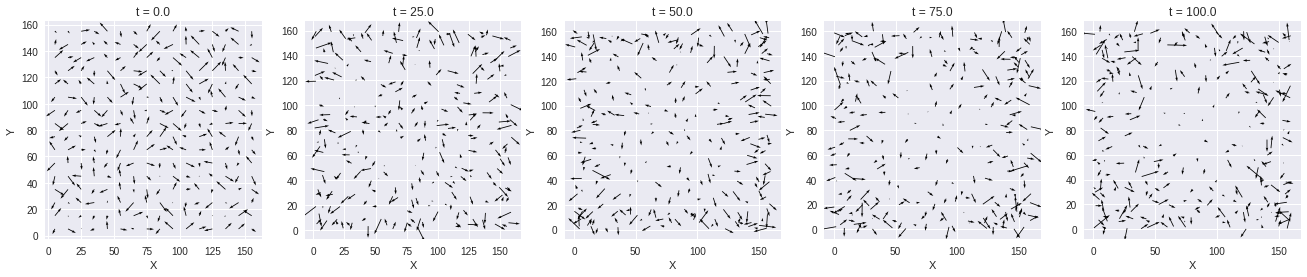

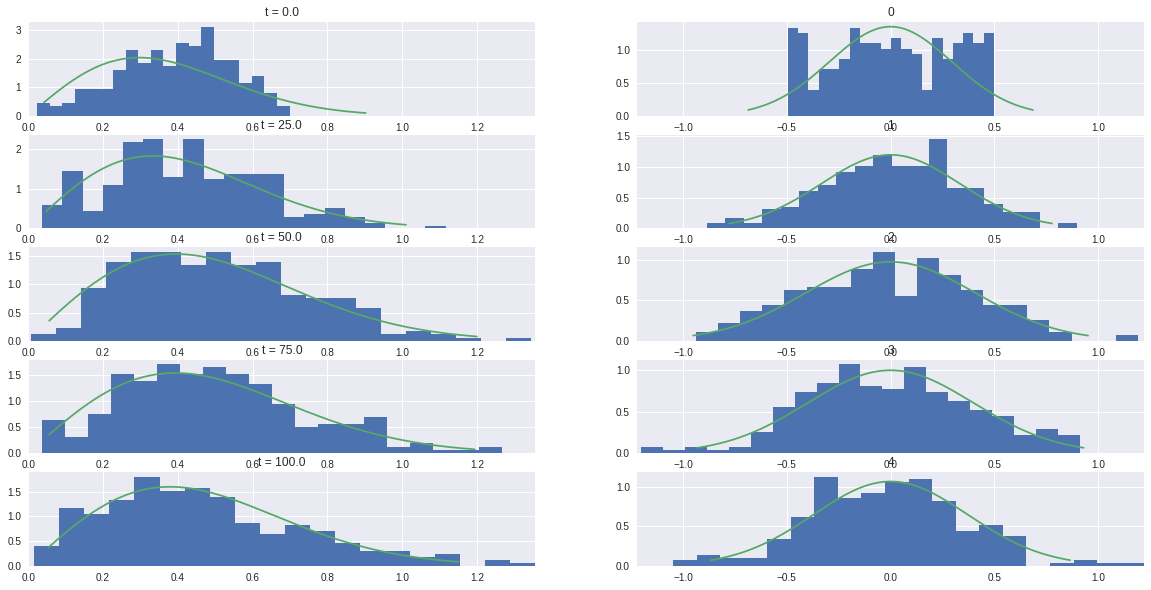

In [95]:
test(numba_compound_double)

In [0]:
numba_compound_float = make_runner(numba_compound_batch, to_device_arrays(numba_to_device), gen_arrays_float, np.float32)

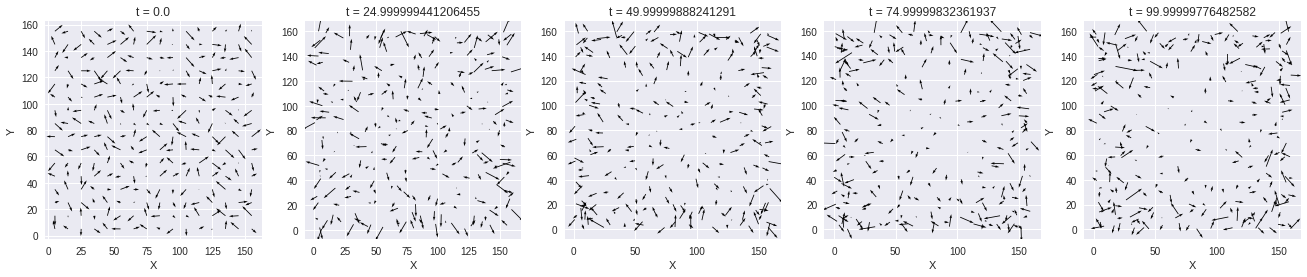

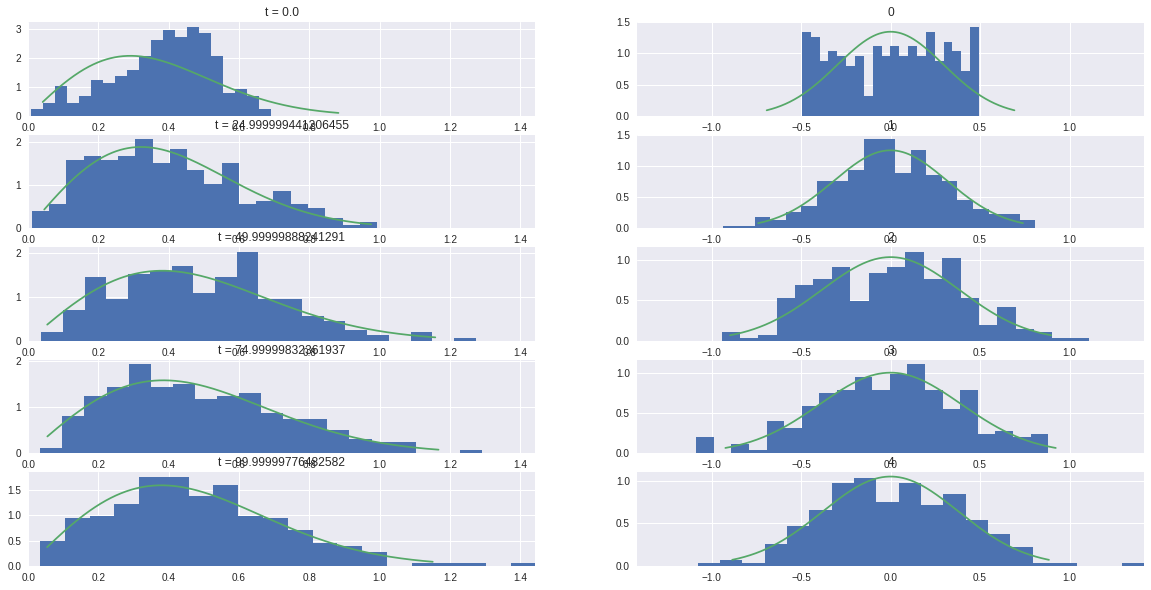

In [97]:
test(numba_compound_float)

In [0]:
numba_compound_flint = make_runner(numba_compound_batch, to_device_arrays(numba_to_device), gen_arrays_int, np.float32)

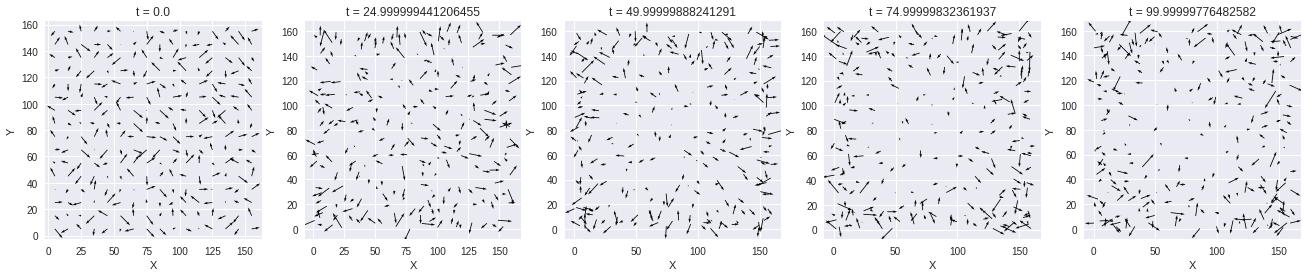

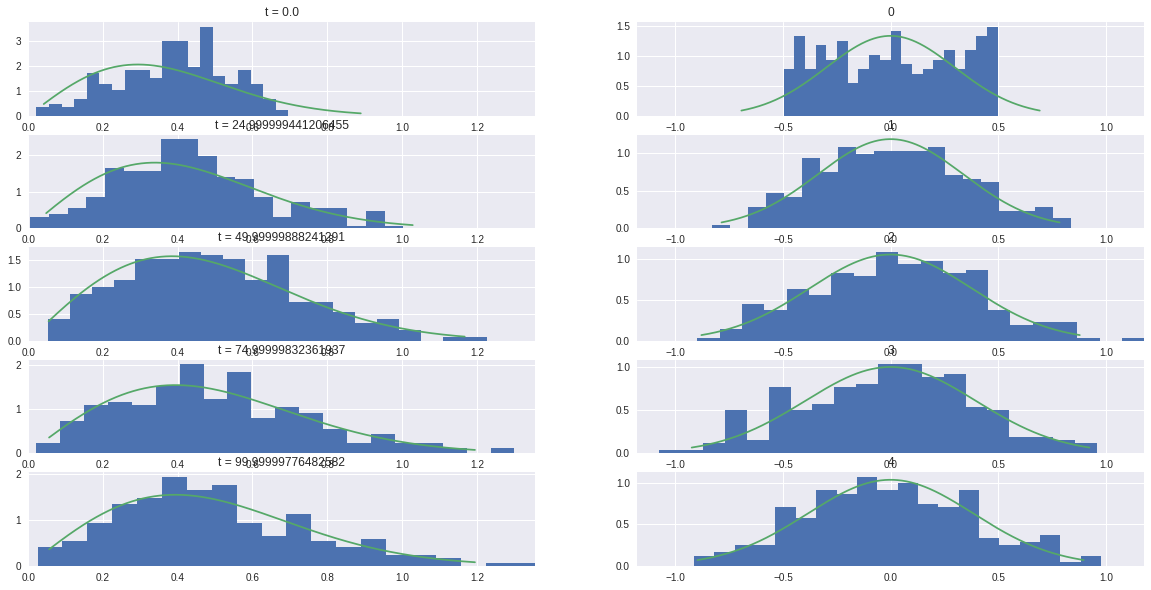

In [99]:
test(numba_compound_flint)

In [0]:
def ntha_t(n, dev_data):
  data = to_host_arrays(numba_to_host)(n, dev_data)
  pos = data.pos.transpose()
  vel = data.vel.transpose()
  return Data(data.charges, data.masses, pos, vel)

def ntda_t(data):
  data = Data(data.charges, data.masses, np.ascontiguousarray(data.pos.transpose()), np.ascontiguousarray(data.vel.transpose()))
  return to_device_arrays(numba_to_device)(data)

numba_compound_batch_t = batcher(ntha_t, numba_compound_step(numba_update_v_t, numba_update_p_t, numba_rebound_t))
numba_compound_double_t = make_runner(numba_compound_batch_t, ntda_t, gen_arrays_double, np.float64)

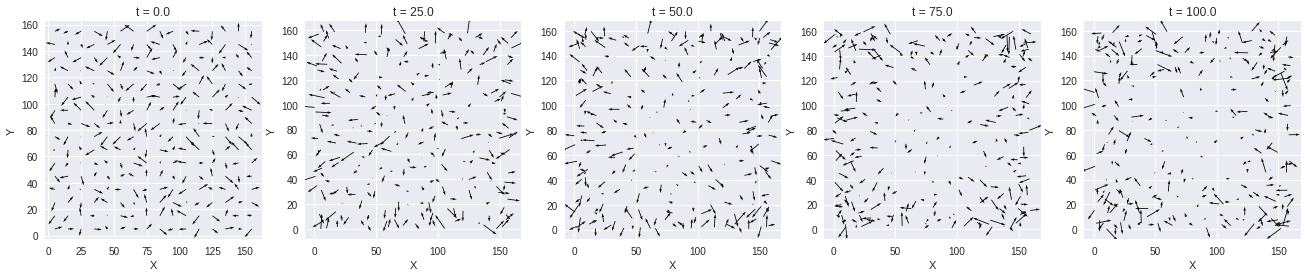

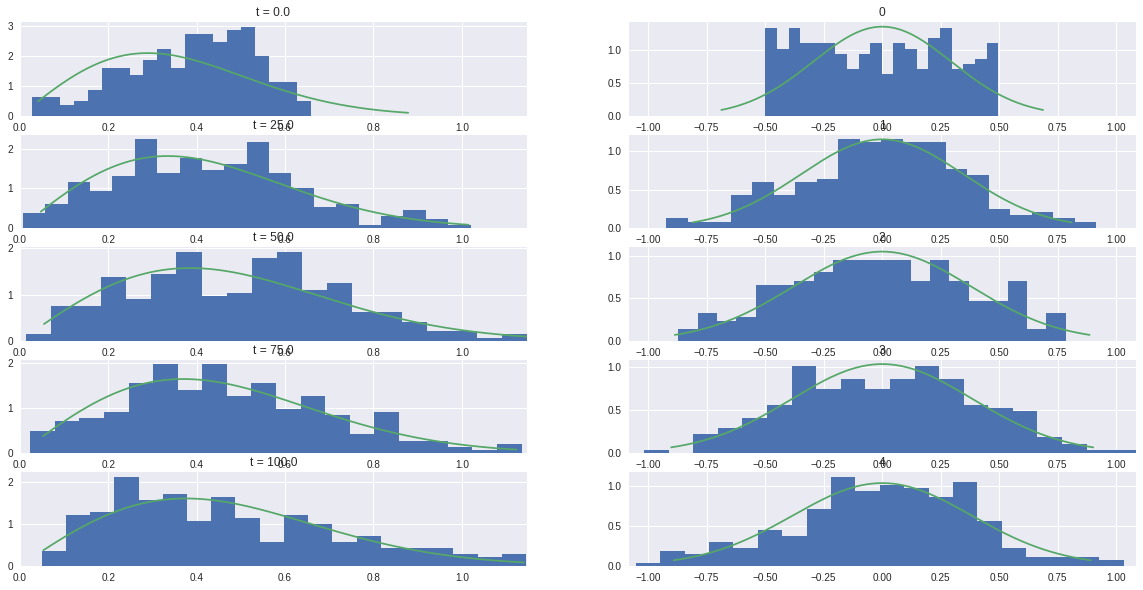

In [101]:
test(numba_compound_double_t)

In [0]:
numba_racing_batch = batcher(to_host_arrays(numba_to_host), numba_simple_step(numba_racing_update))
numba_racing_float = make_runner(numba_racing_batch, to_device_arrays(numba_to_device), gen_arrays_float, np.float32)

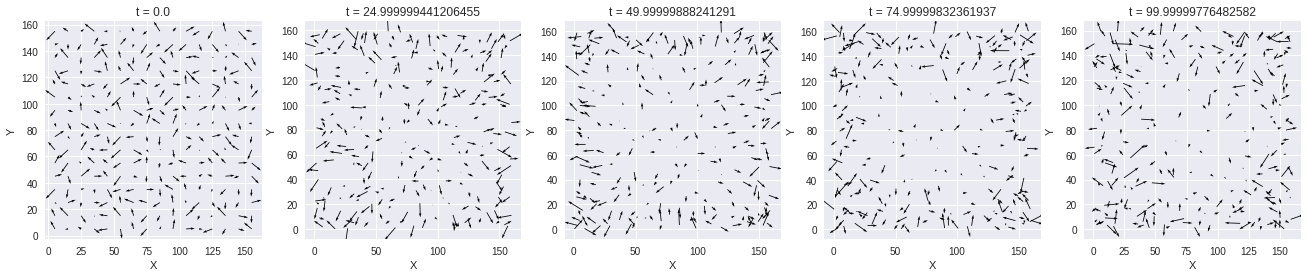

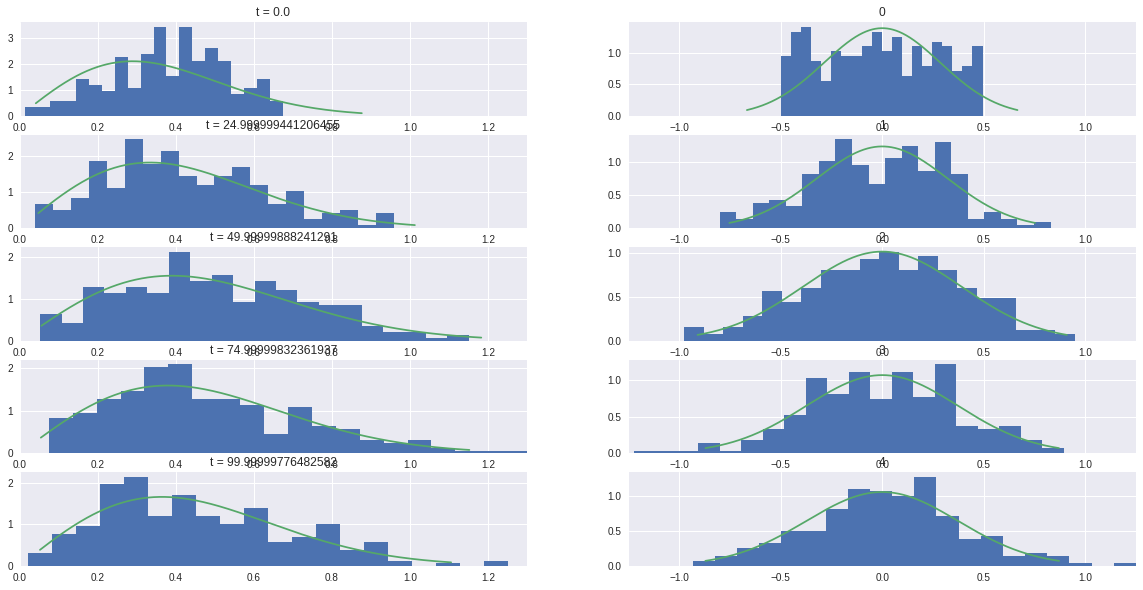

In [103]:
test(numba_racing_float)

In [0]:
numba_racing_scalar_batch = batcher(to_host_values(numba_to_host), numba_simple_step(numba_racing_scalar_update))
numba_racing_scalar_float = make_runner(numba_racing_scalar_batch, to_device_values(numba_to_device), gen_value_float, np.float32)

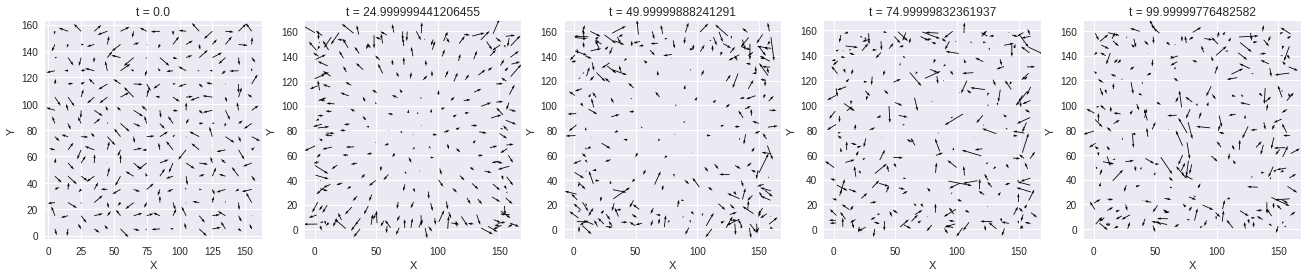

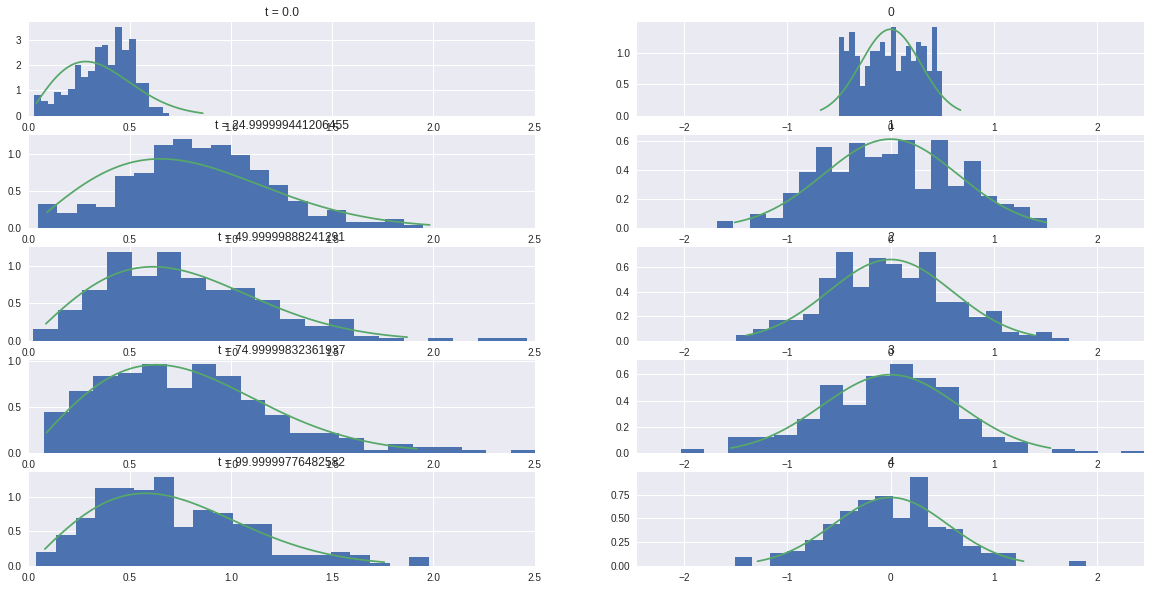

In [105]:
test(numba_racing_scalar_float)

# CUDA

## functions

In [0]:
def make_cuda_to_host(dtype):
  def cuda_to_host(shape, dev_array):
    host_array = np.empty(shape, dtype)
    cuda.memcpy_dtoh(host_array, dev_array)
    return host_array
  return cuda_to_host

def make_cuda_to_host_flat(dtype):
  def cuda_to_host(shape, dev_array):
    if type(dev_array) == tuple:
      a1 = np.empty(shape[0], dtype)
      a2 = np.empty(shape[0], dtype)
      cuda.memcpy_dtoh(a1, dev_array[0])
      cuda.memcpy_dtoh(a2, dev_array[1])
      return np.stack((a1, a2), 1)
    else:
      host_array = np.empty(shape, dtype)
      cuda.memcpy_dtoh(host_array, dev_array)
      return host_array
  return cuda_to_host

def cuda_to_device(host_array):
  dev_array = cuda.mem_alloc(host_array.nbytes)
  cuda.memcpy_htod(dev_array, host_array)
  return dev_array

def cuda_to_device_flat(host_array):
  if len(host_array.shape)==2:
    a1 = cuda.mem_alloc(host_array.nbytes//2)
    a2 = cuda.mem_alloc(host_array.nbytes//2)
    cuda.memcpy_htod(a1, np.ascontiguousarray(host_array[:,0]))
    cuda.memcpy_htod(a2, np.ascontiguousarray(host_array[:,1]))
    return (a1, a2)
  dev_array = cuda.mem_alloc(host_array.nbytes)
  cuda.memcpy_htod(dev_array, host_array)
  return dev_array

def cuda_compound_step(update_v, update_p, rebound, threadsperblock=64):
  def step(size, dt, n, dev_data):
    dd = dev_data
    grid = (math.ceil(n/threadsperblock), 1)
    block = (threadsperblock, 1, 1)
    update_v(dt, dd.charges, dd.masses, dd.pos, dd.vel, n, block=block, grid=grid, shared=0)
    update_p(dt, dd.pos, dd.vel, n, block=block, grid=grid, shared=0)
    rebound(size, dd.pos, dd.vel, n, block=block, grid=grid, shared=0)
  return step

def cuda_simple_step(update, threadsperblock=64):
  def step(size, dt, n, dev_data):
    dd = dev_data
    grid = (math.ceil(n/threadsperblock), 1)
    block = (threadsperblock, 1, 1)
    update(dt, size, dd.charges, dd.masses, dd.pos, dd.vel, n, block=block, grid=grid, shared=0)
  return step

def cuda_simple_step_flat(update, threadsperblock=64):
  def step(size, dt, n, dev_data):
    dd = dev_data
    grid = (math.ceil(n/threadsperblock), 1)
    block = (threadsperblock, 1, 1)
    update(dt, size, dd.charges, dd.masses, dd.pos[0], dd.pos[1], dd.vel[0], dd.vel[1], n, block=block, grid=grid, shared=0)
  return step



In [0]:
mod = SourceModule ("""
__global__ void update_v_double(double dt, double *charges, double *masses, double *pos, double *vel, int n){
  int pi = threadIdx.x + blockIdx.x*blockDim.x;
  if(pi < n){
    double epsilon = 0.0001;
    double diff0;
    double diff1;
    double dist;
    double f0;
    double f1;
    for(int pj = 0; pj<n; pj++){
      if(pi != pj){
        diff0 = pos[pj*2] - pos[pi*2];
        diff1 = pos[pj*2+1] - pos[pi*2+1];
        dist = pow( pow(diff0, 2)+pow(diff1, 2), 0.5 );
        diff0 = diff0 / dist;
        diff1 = diff1 / dist;
        dist = max(epsilon, dist);
        f0 = - charges[pi] * charges[pj] * diff0 / dist / dist;
        f1 = - charges[pi] * charges[pj] * diff1 / dist / dist;
        vel[2*pi] += f0 / masses[pi] * dt;
        vel[2*pi+1] += f1 / masses[pi] * dt;
      }   
    }
  }
}

__global__ void update_p_double(double dt, double *pos, double *vel, int n){
  int pi = threadIdx.x + blockIdx.x*blockDim.x;
  if(pi < n){
    pos[2*pi] = pos[2*pi] + vel[2*pi] * dt;
    pos[2*pi+1] = pos[2*pi+1] + vel[2*pi+1] * dt;
  }
}

__global__ void rebound_double(double size, double *pos, double *vel, int n){
  int pi = threadIdx.x + blockIdx.x*blockDim.x;
  if(pi < n){
    for (int d=0; d<2; d++){
      int i=2*pi+d;
      if(pos[i] < 0){
        pos[i] = - pos[i];
        vel[i] = - vel[i];
      }else if (pos[i] > size) {
        pos[i] = 2*size - pos[i];
        vel[i] = - vel[i];
      }
    }
  }
}

__global__ void racing_update_float(float dt, float size, float *charges, float *masses, float *pos, float *vel, int n){
  int pi = threadIdx.x + blockIdx.x*blockDim.x;
  if(pi < n){
    float epsilon = 0.0001;
    float diff0;
    float diff1;
    float dist;
    float f0;
    float f1;
    for(int pj = 0; pj<n; pj++){
      if(pi != pj){
        diff0 = pos[pj*2] - pos[pi*2];
        diff1 = pos[pj*2+1] - pos[pi*2+1];
        dist = pow( pow(diff0, 2)+pow(diff1, 2), 0.5 );
        diff0 = diff0 / dist;
        diff1 = diff1 / dist;
        dist = max(epsilon, dist);
        f0 = - charges[pi] * charges[pj] * diff0 / dist / dist;
        f1 = - charges[pi] * charges[pj] * diff1 / dist / dist;
        vel[2*pi] += f0 / masses[pi] * dt;
        vel[2*pi+1] += f1 / masses[pi] * dt;
      }
    }
    pos[2*pi] = pos[2*pi] + vel[2*pi] * dt;
    pos[2*pi+1] = pos[2*pi+1] + vel[2*pi+1] * dt;
    for (int d=0; d<2; d++){
      int i=2*pi+d;
      if(pos[i] < 0){
        pos[i] = - pos[i];
        vel[i] = - vel[i];
      }else if (pos[i] > size){
        pos[i] = 2*size - pos[i];
        vel[i] = - vel[i];
      }
    }
  }
}

__global__ void racing_update_float_flat(float reg, float reg_5, float *part_dev_1, float *part_dev_2, float *pos_dev_0, float *pos_dev_1, float *vel_dev_0, float *vel_dev_1, int n)
{
  int pi = threadIdx.x + blockIdx.x*blockDim.x;
  if(pi < n){
    for(int pj = 0; pj<n; pj++){
        if(pi != pj){
            float rad = 0.0001;
            float dist_0 = pos_dev_0[pj] - pos_dev_0[pi];
            float dist_1 = pos_dev_1[pj] - pos_dev_1[pi];
            float norm = 0;
            norm+=pow(dist_0, 2);
            norm+=pow(dist_1, 2);
            float dist_len = pow(norm, 0.5);
            float tmp_0;
            float tmp_1;
            if(dist_len < rad){
               tmp_0 = dist_0 / rad / rad;
               tmp_1 = dist_1 / rad / rad;
            } else{
                tmp_0 = dist_0 / dist_len / dist_len;
                tmp_1 = dist_1 / dist_len / dist_len;
            }
            float f_0 = part_dev_1[pi] * part_dev_1[pj] * tmp_0 / dist_len;
           float f_1 = part_dev_1[pi] * part_dev_1[pj] * tmp_1 / dist_len;
           vel_dev_0[pi] -= f_0 / part_dev_2[pi] * reg;
           vel_dev_1[pi] -= f_1 / part_dev_2[pi] * reg;
        }   
       }
      pos_dev_0[pi] = pos_dev_0[pi] + vel_dev_0[pi] * reg;
      pos_dev_1[pi] = pos_dev_1[pi] + vel_dev_1[pi] * reg;
        if(pos_dev_0[pi] < 0){
            pos_dev_0[pi] = - pos_dev_0[pi];
            vel_dev_0[pi] = -1 * vel_dev_0[pi];
        }else if( pos_dev_0[pi] > reg_5){
            pos_dev_0[pi] = reg_5 - (pos_dev_0[pi] - reg_5);
            vel_dev_0[pi] = -1 * vel_dev_0[pi];
        }if (pos_dev_1[pi] < 0){
            pos_dev_1[pi] = - pos_dev_1[pi];
            vel_dev_1[pi] = -1 * vel_dev_1[pi];
        }else if( pos_dev_1[pi] > reg_5){
            pos_dev_1[pi] = reg_5 - (pos_dev_1[pi] - reg_5);
            vel_dev_1[pi] = -1 * vel_dev_1[pi];
        }  
  }
}
"""
)

## tests

In [0]:
cuda_compound_batch_double = batcher(to_host_arrays(make_cuda_to_host(np.float64)), cuda_compound_step(mod.get_function("update_v_double"),
                               mod.get_function("update_p_double"), mod.get_function("rebound_double")))
cuda_compound_double = make_runner(cuda_compound_batch_double, to_device_arrays(cuda_to_device), gen_arrays_double, np.float64)

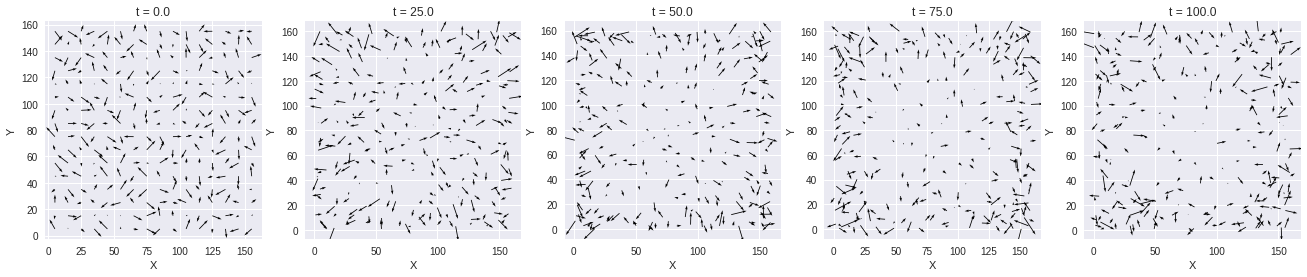

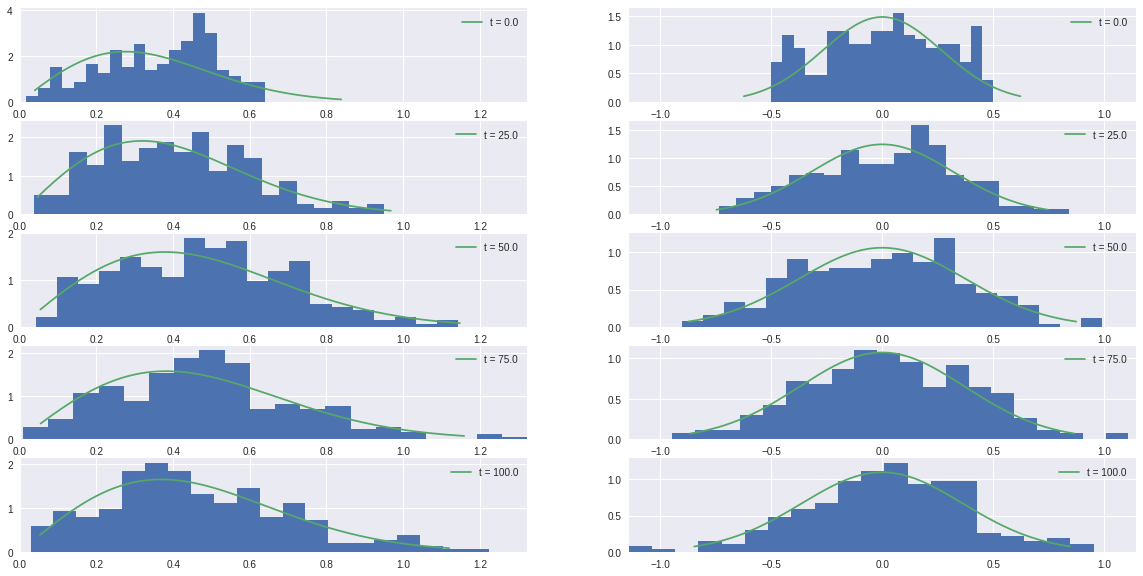

In [123]:
data = test(cuda_compound_double)


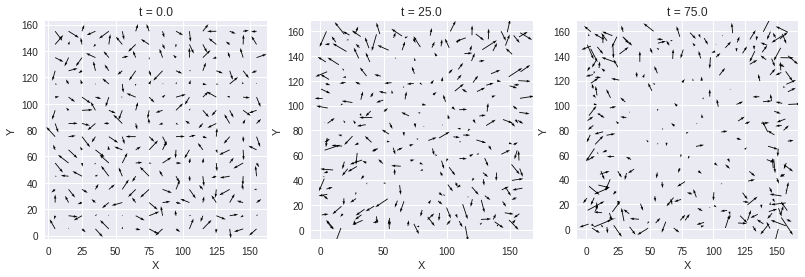

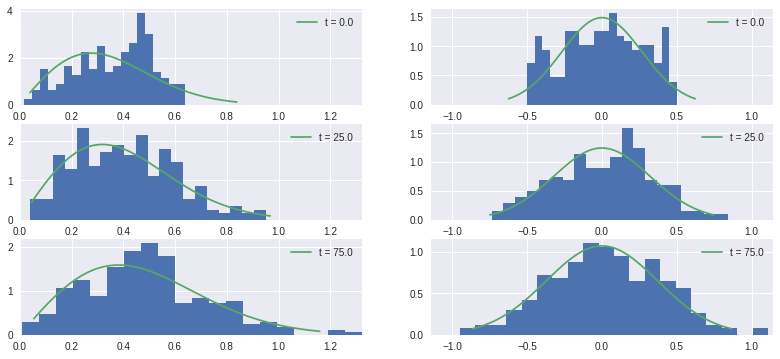

In [125]:
from google.colab import files
multi_particles(data, 3)
plt.savefig("cuda_particles.svg")
files.download("cuda_particles.svg")
multi_maxwell(data, 3, 13.5)
plt.savefig("cuda_distributions.svg")
files.download("cuda_distributions.svg")

In [0]:
cuda_racing_batch_float = batcher(to_host_arrays(make_cuda_to_host(np.float32)), cuda_simple_step(mod.get_function("racing_update_float")))
cuda_racing_float = make_runner(cuda_racing_batch_float, to_device_arrays(cuda_to_device), gen_arrays_float, np.float32)

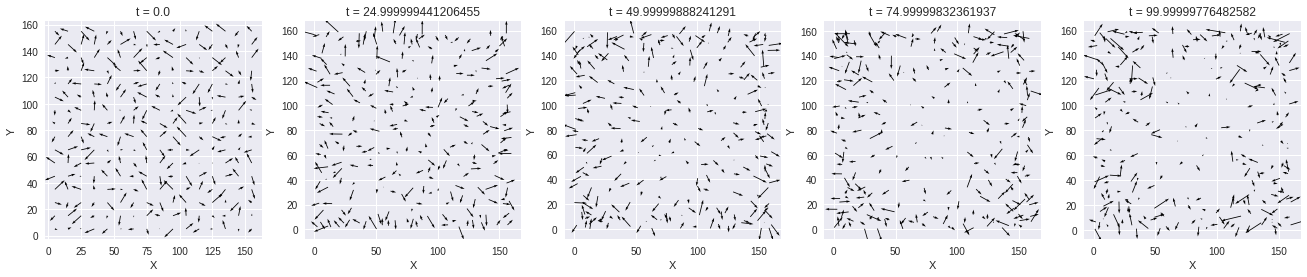

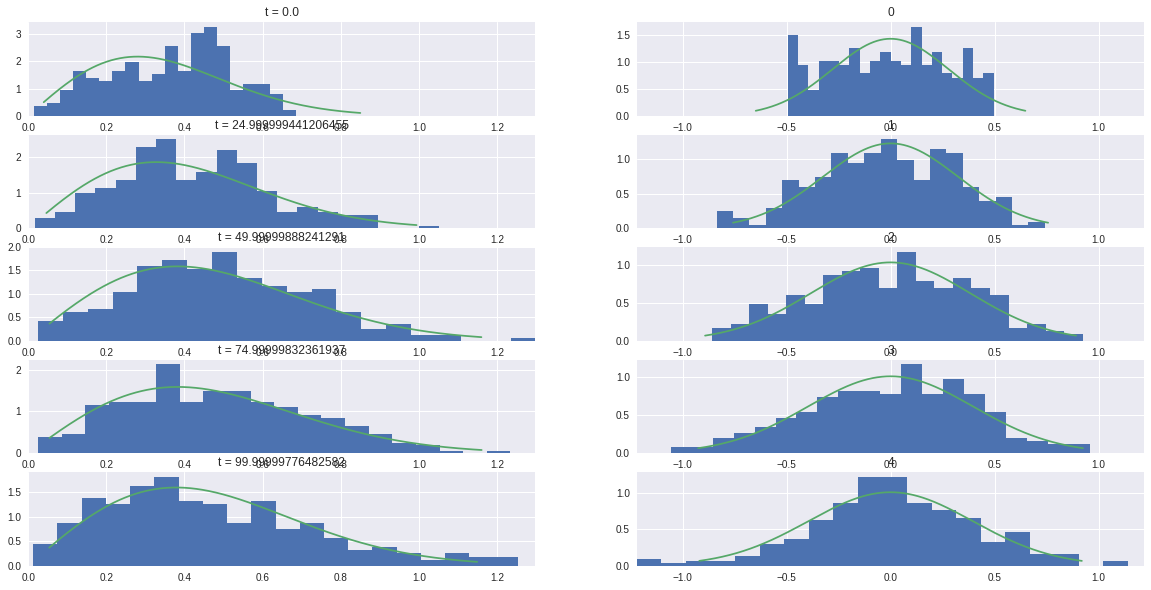

In [111]:
test(cuda_racing_float)

In [0]:
cuda_racing_batch_float_flat = batcher(to_host_arrays(make_cuda_to_host_flat(np.float32)), cuda_simple_step_flat(mod.get_function("racing_update_float_flat")))
cuda_racing_float_flat = make_runner(cuda_racing_batch_float_flat, to_device_arrays(cuda_to_device_flat), gen_arrays_float, np.float32)

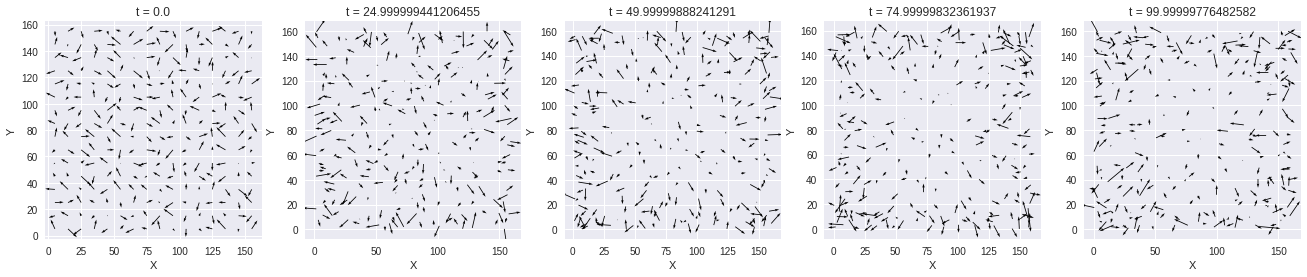

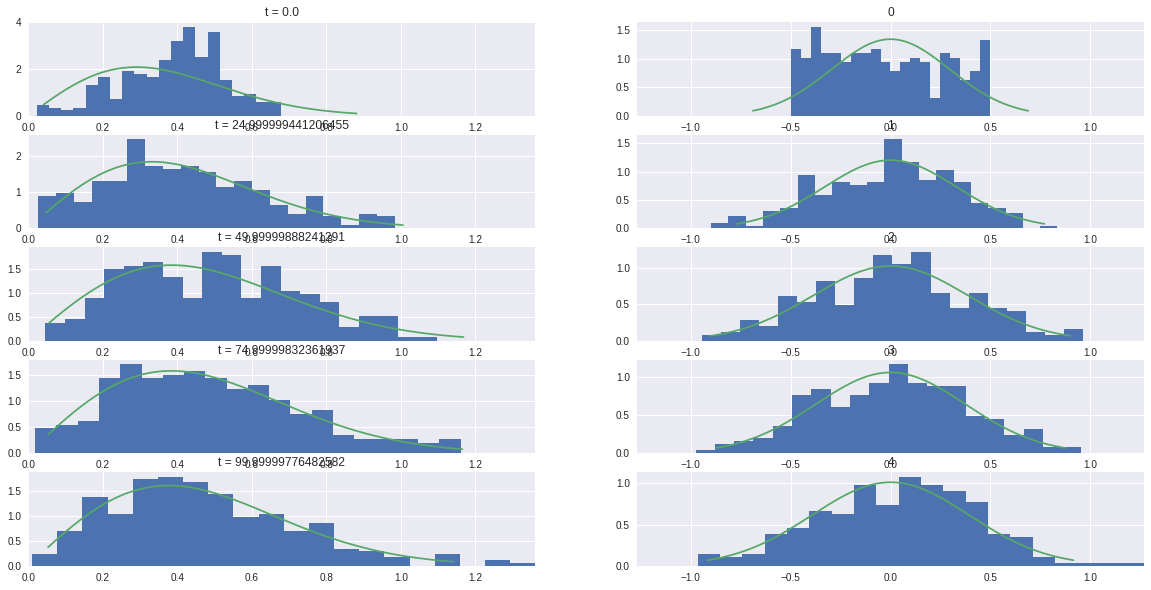

In [113]:
test(cuda_racing_float_flat)

# OpenCL

## functions

In [0]:
def prepare_gpu_ctx():
    platform = cl.get_platforms()[0]
    my_gpu_devices = platform.get_devices(device_type=cl.device_type.GPU)
    if not my_gpu_devices:
        print("Warning: no GPU devices found!")
        print("Falling back to platform[0].device[0]")
        device = platform.get_devices()[0]
    else:
        device = my_gpu_devices[0]
    ctx = cl.Context([device])
    queue = cl.CommandQueue(ctx)
    return ctx, queue

def make_opencl_to_device_flat(queue):
  def to_device(host_array):
    if len(host_array.shape)==2:
      return (cl_array.to_device(queue, np.ascontiguousarray(host_array[:, 0])),
              cl_array.to_device(queue, np.ascontiguousarray(host_array[:, 1])))
    else:
      return cl_array.to_device(queue, host_array)
  return to_device

def opencl_to_host_flat(n, dev_array):
  if type(dev_array) == tuple:
    return np.stack((a.get() for a in dev_array), 1)
  else:
    return dev_array.get()

def make_program(context):
  return cl.Program(context, """
    __kernel void update_v(
    __global const float *q, __global const float *m,
    __global const float *x, __global const float *y,
    __global float *vx, __global float *vy,
    const float dt, const int n)
    {
        unsigned int i = get_global_id(0);
        float rad = 0.0001;
        float dist_x, dist_y, dist_len;
        float tmp_x, tmp_y;
        float fx, fy;
        if ( i < n ){
            fx = 0.0;
            fy = 0.0;
            for( int j = 0; j < n; j++ ){
                if ( j != i ){
                    dist_x = x[i] - x[j]; // force from j'th to i'th 
                    dist_y = y[i] - y[j];
                    dist_len = sqrt( dist_x * dist_x + dist_y * dist_y );
                    if (dist_len < rad){
                        tmp_x = dist_x / rad / rad;
                        tmp_y = dist_y / rad / rad;
                    } else {
                        tmp_x = dist_x / dist_len / dist_len;
                        tmp_y = dist_y / dist_len / dist_len;
                    }
                    fx += q[j] * tmp_x / dist_len;
                    fy += q[j] * tmp_y / dist_len;
                }
            }
            vx[i] += fx * q[i] / m[i] * dt;
            vy[i] += fy * q[i] / m[i] * dt;
        }
    }
    
    __kernel void update_p(
    __global float *x, __global float *y,
    __global const float *vx, __global const float *vy,
    __private const float dt, __private const int n)
    {
        unsigned int i = get_global_id(0);
        if ( i < n ){
            x[i] += vx[i] * dt;
            y[i] += vy[i] * dt;
        }
    }
    
    __kernel void rebound(
    __global float *x, __global float *y,
    __global float *vx, __global float *vy,
    const float size, const int n)
    {
        unsigned int i = get_global_id(0);
        if ( i < n ){
            if ( x[i] < 0 ){
                x[i] = - x[i];
                vx[i] = - vx[i];
            } else if (x[i] > size){
                x[i] = size - (x[i] - size);
                vx[i] = - vx[i];
            }
            if ( y[i] < 0 ){
                y[i] = - y[i];
                vy[i] = - vy[i];
            } else if (y[i] > size){
                y[i] = size - (y[i] - size);
                vy[i] = - vy[i];
            }
        }
    }
    """).build()

def opencl_compound_step_flat(ctx, queue, threadsperblock=64):
  program = make_program(ctx)
  update_v = program.update_v
  update_v.set_scalar_arg_dtypes([None, None, None, None, None, None, np.float32, np.int32 ] )
  update_p = program.update_p
  update_p.set_scalar_arg_dtypes([None, None, None, None, np.float32, np.int32])
  rebound = program.rebound
  rebound.set_scalar_arg_dtypes([None, None, None, None, np.float32, np.int32 ])

  def step(size, dt, n, dev_data):
    #TODO        n_of_threads = [reg["id_gpu"].size]
    dd = dev_data
    global_work = [math.ceil(n / threadsperblock) * threadsperblock]
    local_work = [threadsperblock]
    update_v(queue, global_work, local_work, dd.charges.data, dd.masses.data, dd.pos[0].data, dd.pos[1].data, dd.vel[0].data, dd.vel[1].data, dt, n)
    update_p(queue, global_work, local_work, dd.pos[0].data, dd.pos[1].data, dd.vel[0].data, dd.vel[1].data, dt, n)
    rebound(queue, global_work, local_work, dd.pos[0].data, dd.pos[1].data, dd.vel[0].data, dd.vel[1].data, size, n)
  return step


## tests

In [0]:
ctx, queue = prepare_gpu_ctx()
opencl_compound_batch_float_flat = batcher(to_host_arrays(opencl_to_host_flat), opencl_compound_step_flat(ctx, queue))
opencl_compound_float_flat = make_runner(opencl_compound_batch_float_flat, to_device_arrays(make_opencl_to_device_flat(queue)), gen_arrays_float, np.float32)

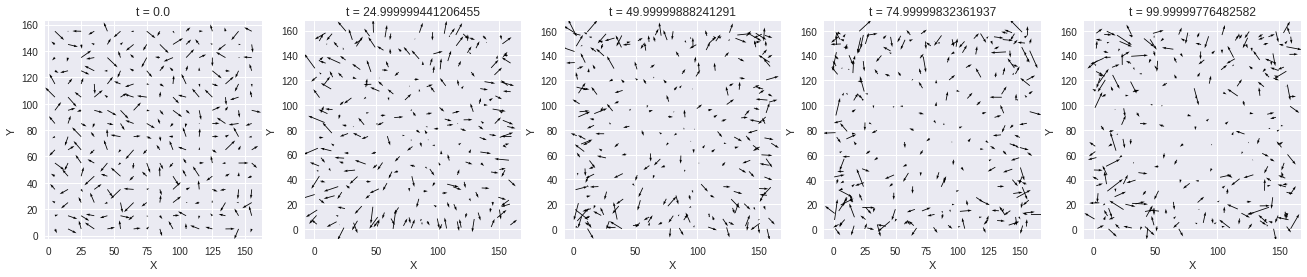

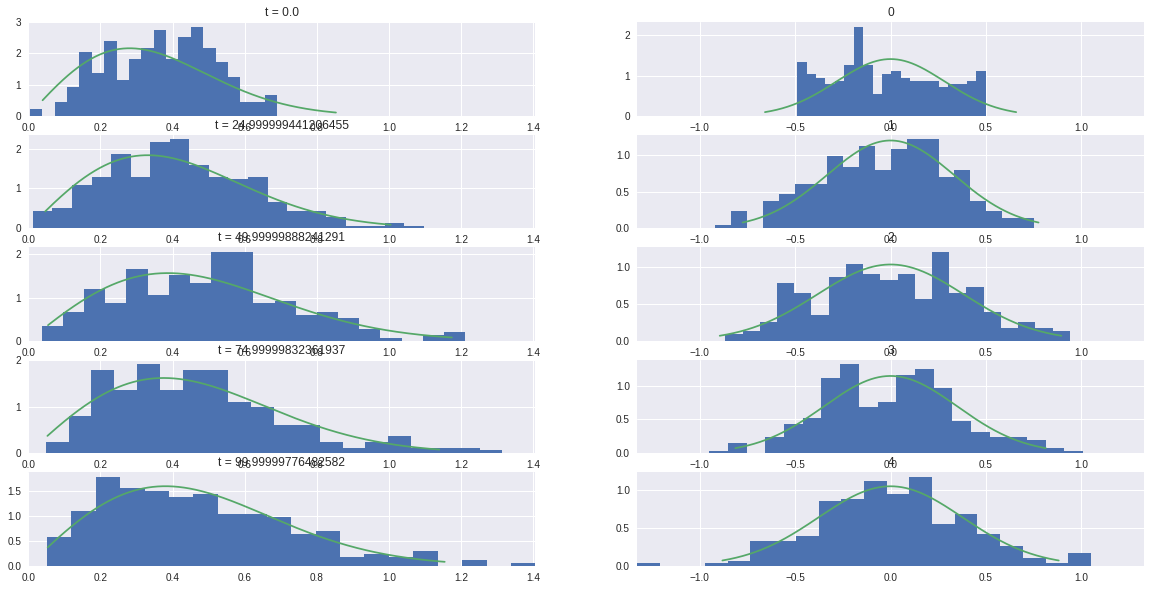

In [116]:
test(opencl_compound_float_flat)

# Numpy

## functions

In [0]:
def numpy_simple_step(size, dt, n, dev_data):
  q, m, p, v = dev_data
  epsilon = type(p[0, 0])(0.0001)
  diff = p[:, np.newaxis] - p[:, :, np.newaxis] # pairwise distance vectors
  dist = np.sqrt((diff**2).sum(0)) # absolute distances
  np.fill_diagonal(dist, 1.0)
  diff = diff / dist # normalized distance vectors
  dist = np.maximum(epsilon, dist)
  f = q[np.newaxis, :, np.newaxis] * q[np.newaxis, np.newaxis, :] * diff / (dist**2)
  v -= f.sum(2)/m * dt
  p += v*dt
  below_zero = p < 0
  p[below_zero] = -p[below_zero]
  v[below_zero] = -v[below_zero]
  above_size = p > size
  p[above_size] = 2*size - p[above_size]
  v[above_size] = -v[above_size]
  

## tests

In [0]:
numpy_simple_batch = batcher(to_host_arrays(lambda n, x: np.array(x.transpose()) if len(x.shape)==2 else np.array(x)), numpy_simple_step)
numpy_simple_float = make_runner(numpy_simple_batch, to_device_arrays(lambda x: np.array(x.transpose()) if len(x.shape)==2 else np.array(x)), gen_arrays_float, np.float32)

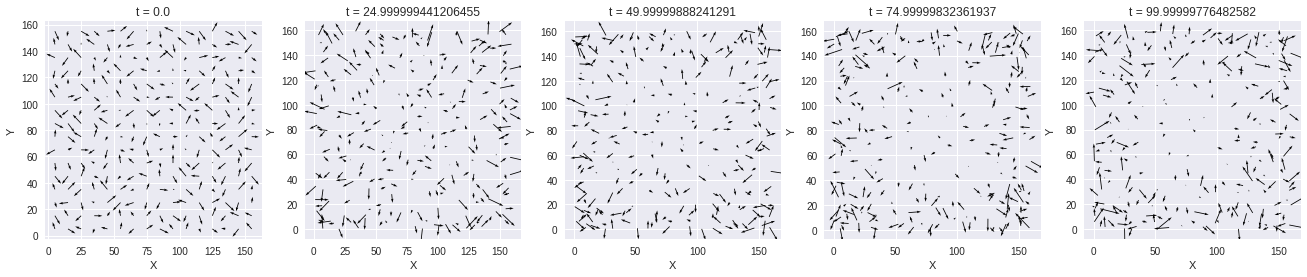

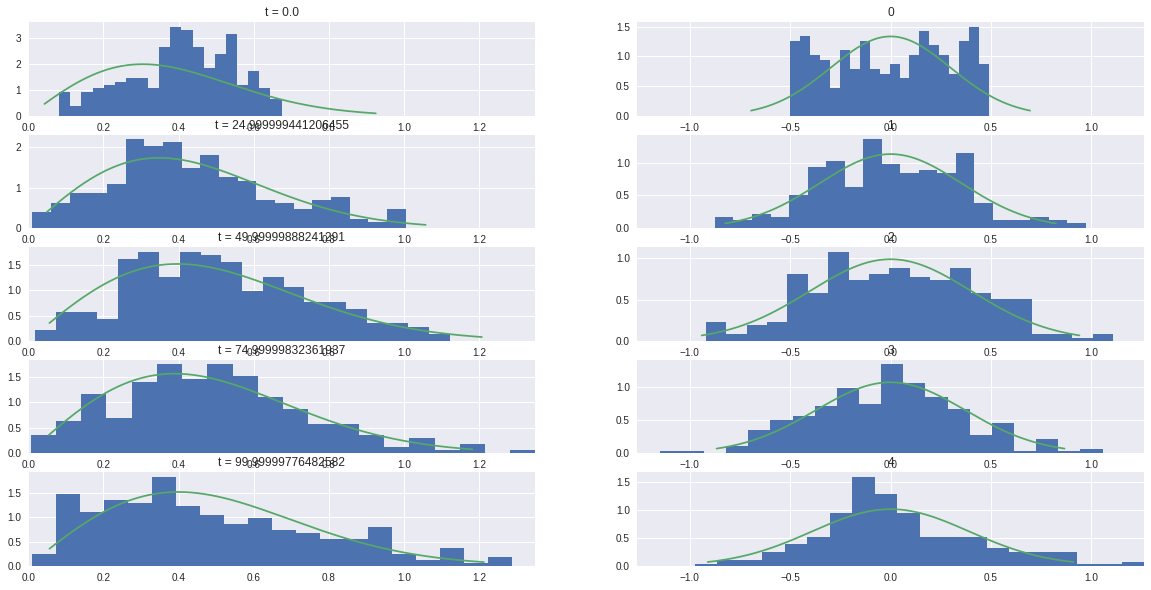

In [119]:
test(numpy_simple_float)

# performance tester

In [0]:
from sys import stdout

def check_performance(runner, scale, batch):
  frame = pd.DataFrame(runner(scale, batch, batch), columns=["t", "time", "perf", "data"])
  return frame.perf.iloc[-1]-frame.perf.iloc[0]

def _time_all(runners, opts):
  for k, runner in runners.items():
    print("\n", k)
    for scale, batch in opts:
      stdout.write(f" {scale} {batch}")
      sim_time = check_performance(runner, scale, batch)
      stdout.write(f" {sim_time:3.2}")
      yield k, scale, batch, sim_time

def _gen_scales(max_pow=9):
  yield 2
  yield 3
  for i in range(max_pow-1):
    yield 4 * 2**i
    yield 5 * 2**i
    yield 6 * 2**i
    yield 7 * 2**i

def _batch(s, max_batch=4096, crit1=32, crit2=64):
  if s<=crit1:
    return max_batch
  elif s<=crit2:
    return math.ceil(max_batch * crit1**2 / s**2)
  else:
    return math.ceil(max_batch * crit1**2 * crit2**2 / s**4)

def time_all(runners, max_batch=2048, max_scale_pow=8, crit1=32, crit2=64):
  opts = [(s, _batch(s, max_batch, crit1, crit2)) for s in _gen_scales(max_scale_pow)]
  return pd.DataFrame.from_records(_time_all(runners, opts), columns=("runner", "scale", "batch", "time"))

def timeplot(t, **kwargs):
  if "n" not in t:
    t["n"] = t.scale**2
  t["fps"] = t.batch / t.time
  t["steptime"] = t.time / t.batch
  t["pups"] = t.n * t.fps
  t["ops"] = t.n * t.pups
  t.index = t.n
  r = t.groupby("runner")
  plt.figure(1)
  r.steptime.plot(legend=True, title="steps time", **kwargs)[0].set_prop_cycle(None)
  plt.figure(2)
  r.fps.plot(legend=True, logx=True, logy=True, title="steps/second", **kwargs)[0].set_prop_cycle(None)
  plt.figure(3)
  r.pups.plot(legend=True, logx=True, logy=True, title="particles/second", **kwargs)[0].set_prop_cycle(None)
  plt.figure(4)
  r.ops.plot(legend=True, logx=True, logy=True, title="interactions/second", **kwargs)[0].set_prop_cycle(None)

## numba

In [76]:
numba_runners = dict(zip(("numba_compound_double", "numba_compound_float", "numba_compound_flint", "numba_compound_double_t", "numba_racing_float", "numba_racing_scalar_float"), 
                     (numba_compound_double, numba_compound_float, numba_compound_flint, numba_compound_double_t, numba_racing_float, numba_racing_scalar_float)))
numba_times = time_all(numba_runners)


 numba_compound_double
 2 2048 1.9 3 2048 2.0 4 2048 2.0 5 2048

KeyboardInterrupt: ignored

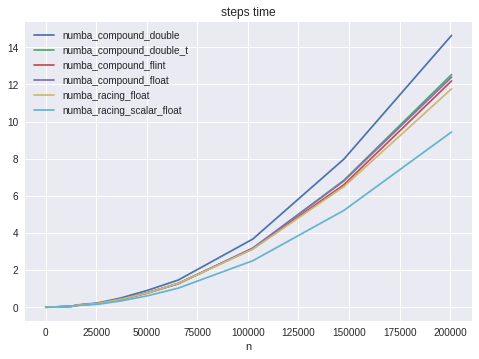

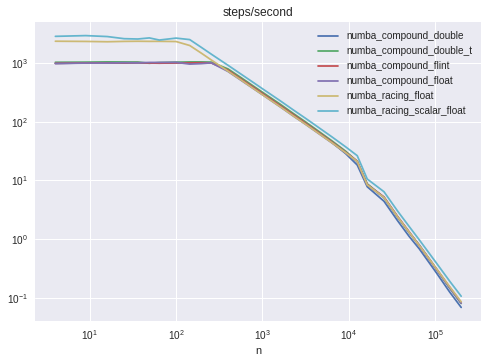

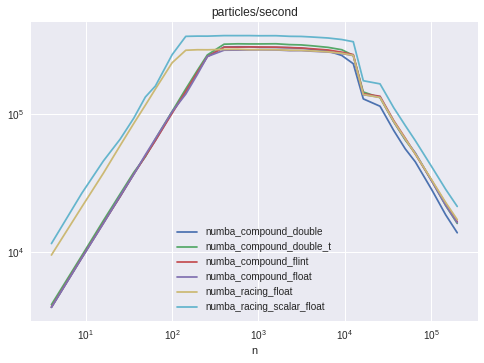

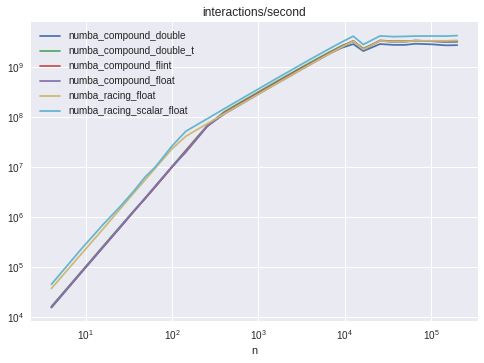

In [50]:
timeplot(numba_times)

## cuda

In [51]:
cuda_runners = dict(zip(("cuda_compound_double", "cuda_racing_float", "cuda_racing_float_flat"), (cuda_compound_double, cuda_racing_float, cuda_racing_float_flat)))
cuda_times = time_all(cuda_runners)


 cuda_compound_double
 2 2048 0.26 3 2048 0.25 4 2048 0.31 5 2048 0.4 6 2048 0.52 7 2048 0.7 8 2048 0.9 10 2048 1.4 12 2048 2.0 14 2048 2.7 16 2048 3.5 20 2048 5.4 24 2048 7.8 28 2048 1.1e+01 32 2048 1.4e+01 40 1311 1.4e+01 48 911 1.4e+01 56 669 1.4e+01 64 512 1.5e+01 80 210 9.7 96 102 7.6 112 55 6.8 128 32 9.3 160 14 7.1 192 7 7.6 224 4 8.0 256 2 6.7 320 1 8.2 384 1 1.7e+01 448 1 3.1e+01
 cuda_racing_float
 2 2048 0.11 3 2048 0.13 4 2048 0.22 5 2048 0.34 6 2048 0.48 7 2048 0.65 8 2048 0.84 10 2048 1.3 12 2048 1.9 14 2048 2.5 16 2048 3.3 20 2048 5.2 24 2048 7.5 28 2048 1e+01 32 2048 1.3e+01 40 1311 1.3e+01 48 911 1.4e+01 56 669 1.4e+01 64 512 1.4e+01 80 210 9.3 96 102 7.0 112 55 6.0 128 32 8.4 160 14 6.3 192 7 6.8 224 4 7.1 256 2 5.9 320 1 7.2 384 1 1.5e+01 448 1 2.7e+01
 cuda_racing_float_flat
 2 2048 0.11 3 2048 0.13 4 2048 0.23 5 2048 0.35 6 2048 0.49 7 2048 0.67 8 2048 0.87 10 2048 1.3 12 2048 1.9 14 2048 2.6 16 2048 3.4 20 2048 5.4 24 2048 7.7 28 2048 1e+01 32 2048 1.4e+01 40 131

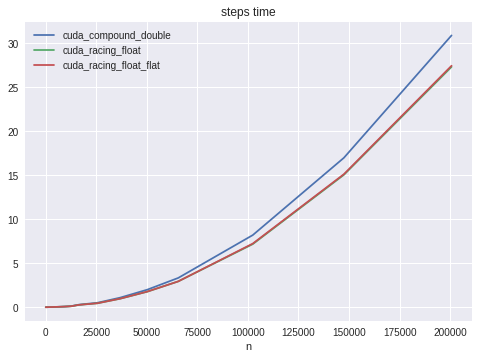

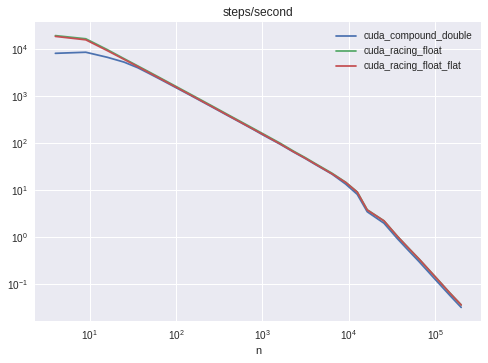

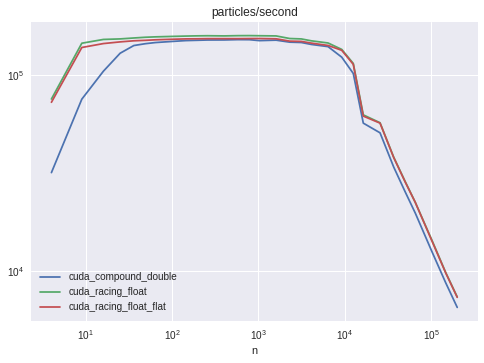

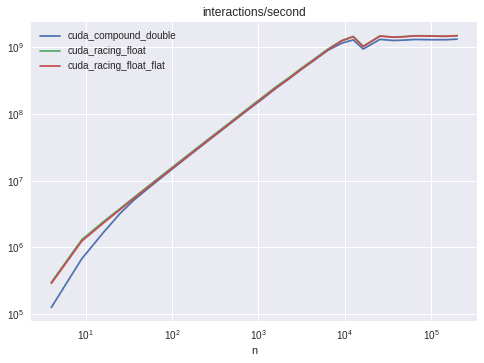

In [52]:
timeplot(cuda_times)

## opencl

In [53]:
opencl_times = time_all({"opencl_compound_float_flat": opencl_compound_float_flat}, 8192)



 opencl_compound_float_flat
 2 8192 1.0 3 8192 1.0 4 8192 1.0 5 8192 1.0 6 8192 1.0 7 8192 1.0 8 8192 1.0 10 8192 1.0 12 8192 1.0 14 8192 1.0 16 8192 1.1 20 8192 1.5 24 8192 2.1 28 8192 2.7 32 8192 3.4 40 5243 3.3 48 3641 3.3 56 2675 3.3 64 2048 3.4 80 839 2.2 96 405 1.7 112 219 1.3 128 128 1.7 160 53 1.3 192 26 1.4 224 14 1.3 256 8 1.3 320 4 1.6 384 2 1.7 448 1 1.5

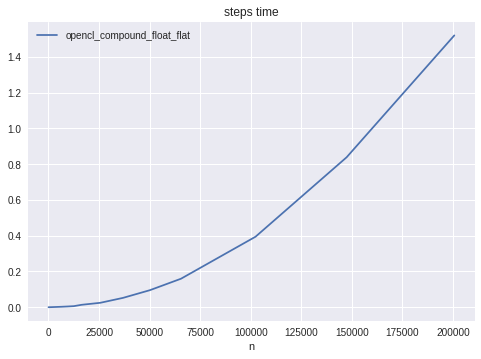

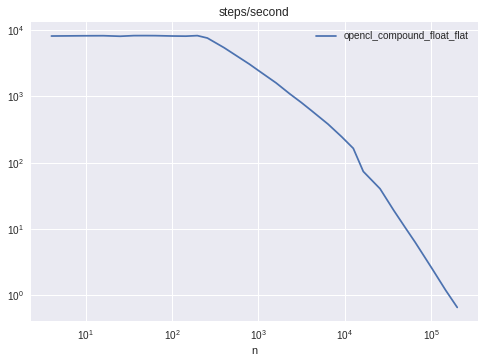

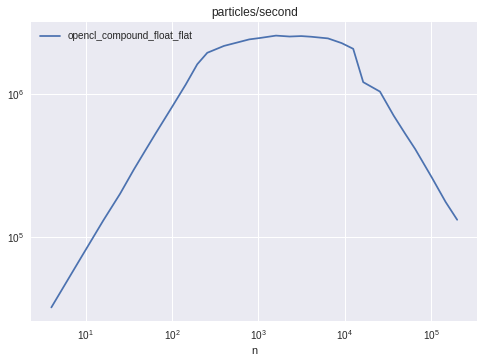

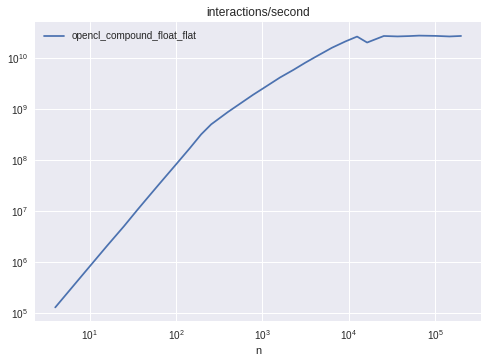

In [54]:
timeplot(opencl_times)

## numpy

In [55]:
numpy_times = time_all({"numpy_simple_float": numpy_simple_float}, 8192, 6, 8, 8)


 numpy_simple_float
 2 8192 0.53 3 8192 0.54 4 8192 0.7 5 8192 0.96 6 8192 1.4 7 8192 2.1 8 8192 3.1 10 3356 2.7 12 1619 2.6 14 874 2.7 16 512 2.6 20 210 2.6 24 102 2.6 28 55 2.6 32 32 2.6 40 14 2.8 48 7 3.0 56 4 3.1 64 2 2.7 80 1 3.6 96 1 7.4 112 1 1.4e+01

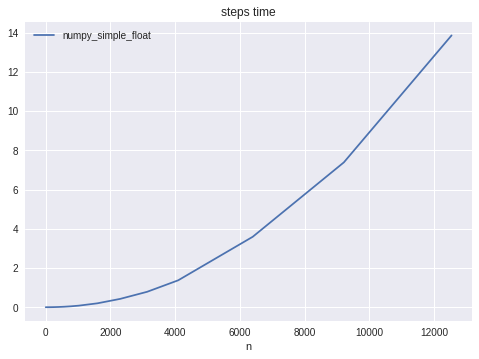

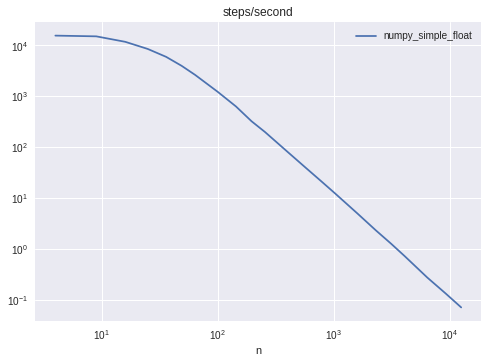

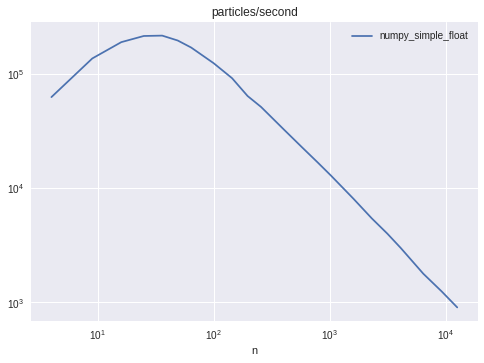

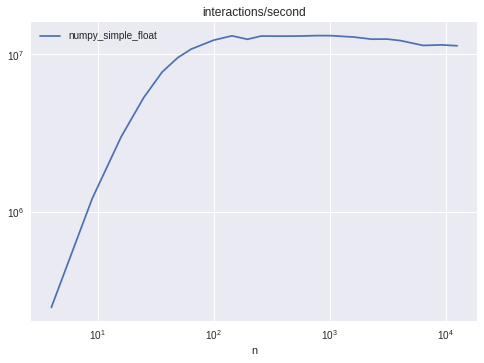

In [56]:
timeplot(numpy_times)

## combined

In [0]:
times = pd.concat((numba_times, cuda_times, opencl_times, numpy_times))

In [126]:
interesting_runners = {"Numba": numba_compound_float, "CUDA": cuda_compound_double, "PyOpenCL": opencl_compound_float_flat}
interesting_times = time_all(interesting_runners)
numpy_times = time_all({"Numpy": numpy_simple_float}, 8192, 6, 8, 8)
interesting_times = pd.concat((interesting_times, numpy_times))


 Numba
 2 2048 2.6 3 2048 2.0 4 2048 2.0 5 2048 2.0 6 2048 2.0 7 2048 2.0 8 2048 2.0 10 2048 2.0 12 2048 2.0 14 2048 2.0 16 2048 2.0 20 2048 2.8 24 2048 4.1 28 2048 5.5 32 2048 7.2 40 1311 7.2 48 911 7.3 56 669 7.3 64 512 7.3 80 210 4.8 96 102 3.4 112 55 2.6 128 32 3.8 160 14 2.7 192 7 2.9 224 4 3.1 256 2 2.5 320 1 3.2 384 1 6.8 448 1 1.2e+01
 CUDA
 2 2048 0.21 3 2048 0.24 4 2048 0.24 5 2048 0.36 6 2048 0.5 7 2048 0.67 8 2048 0.87 10 2048 1.3 12 2048 1.9 14 2048 2.7 16 2048 3.5 20 2048 5.4 24 2048 7.8 28 2048 1.1e+01 32 2048 1.4e+01 40 1311 1.4e+01 48 911 1.4e+01 56 669 1.4e+01 64 512 1.4e+01 80 210 9.6 96 102 7.6 112 55 6.7 128 32 9.3 160 14 7.0 192 7 7.6 224 4 7.9 256 2 6.6 320 1 8.1 384 1 1.7e+01 448 1 3e+01
 PyOpenCL
 2 2048 0.24 3 2048 0.24 4 2048 0.25 5 2048 0.25 6 2048 0.24 7 2048 0.24 8 2048 0.25 10 2048 0.24 12 2048 0.24 14 2048 0.24 16 2048 0.27 20 2048 0.38 24 2048 0.51 28 2048 0.68 32 2048 0.87 40 1311 0.84 48 911 0.83 56 669 0.83 64 512 0.84 80 210 0.55 96 102 0.41 112 55

In [0]:
interesting_times = pd.DataFrame(times[np.isin(times.runner, ("numba_racing_float", "cuda_racing_float", "opencl_compound_float_flat", "numpy_simple_float"))])

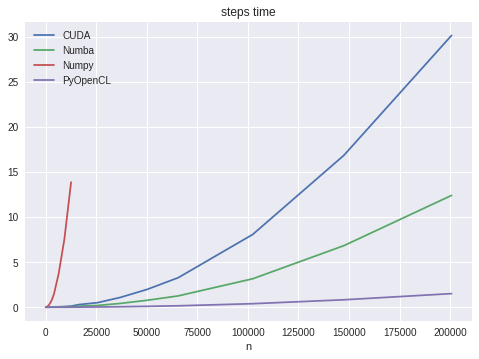

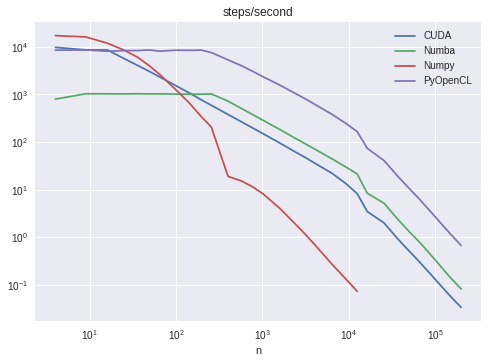

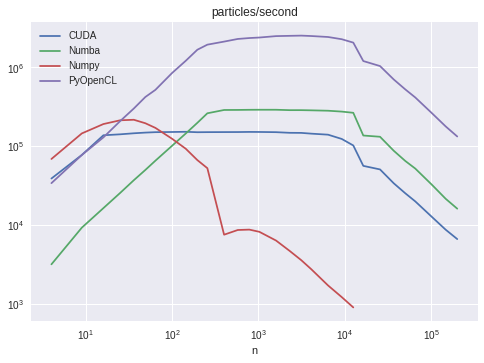

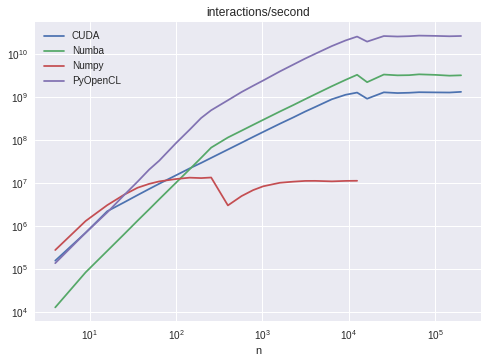

In [127]:
timeplot(interesting_times)
plt.figure(2)
plt.savefig("sps.svg")
files.download("sps.svg")
plt.figure(3)
plt.savefig("pps.svg")
files.download("pps.svg")
plt.figure(4)
plt.savefig("ips.svg")
files.download("ips.svg")

## compare to slides

In [0]:
batch = 100
numba_n  = np.array((100, 200, 300, 500, 700, 1000, 1500, 2000, 3000, 5000))
numba_t  = np.array((131, 133, 154, 244, 335, 474, 706, 939, 1420, 2410))
cuda_n   = np.array((100, 200, 300, 500, 700, 1000, 1500, 2000, 3000, 5000, 10000, 50000, 100000, 500000, 1000000))
cuda_t   = np.array((12.9, 13, 13.2, 13.2, 12.9, 13.8, 14.7, 15.4, 15.9, 18.3, 22.2, 68.8, 127, 510, 981))
opencl_n = np.array((100, 200, 300, 500, 700, 1000, 1500, 2000, 3000, 5000, 7000, 10000, 15000, 20000))
opencl_t = np.array((2020, 2030, 2040, 2040, 2060, 2060, 2130, 2120, 2190, 2340, 2480, 2850, 3890, 5340))
python_n = np.array((10, 20, 30, 50, 70, 100, 150, 200, 300))
python_t = np.array((34.1, 97.6, 188, 462, 876, 1730, 3850, 6750, 14800))
slide_times = pd.concat([
  pd.DataFrame({"runner": f"{r}_old", "n": globals()[f"{r}_n"], "time": globals()[f"{r}_t"]/1000})
  for r in ("numba", "cuda", "opencl", "python")])

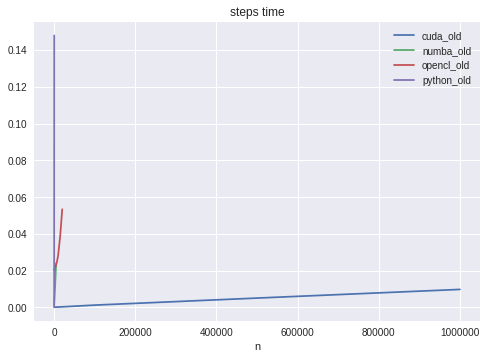

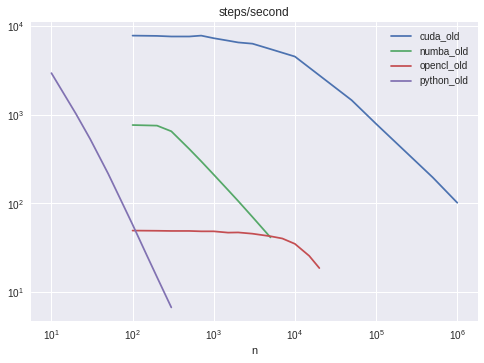

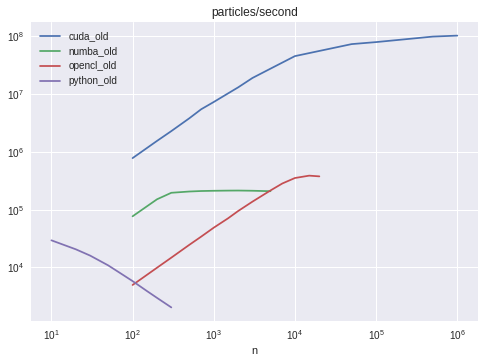

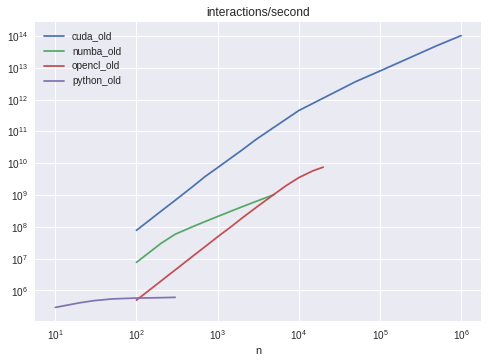

In [115]:
slide_times["batch"] = 100
timeplot(slide_times)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


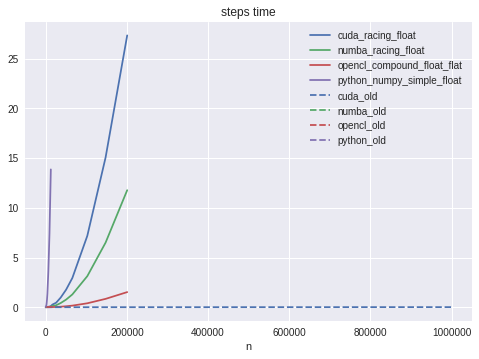

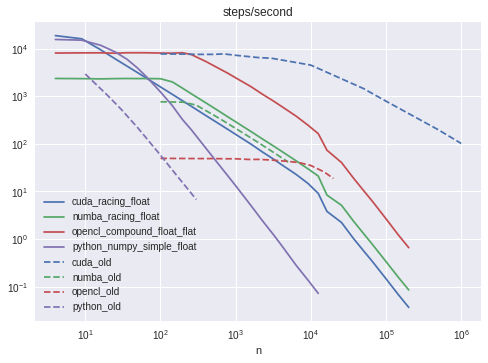

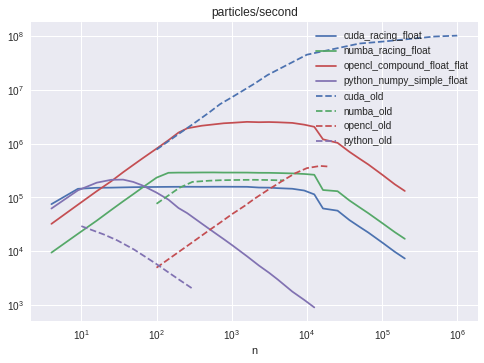

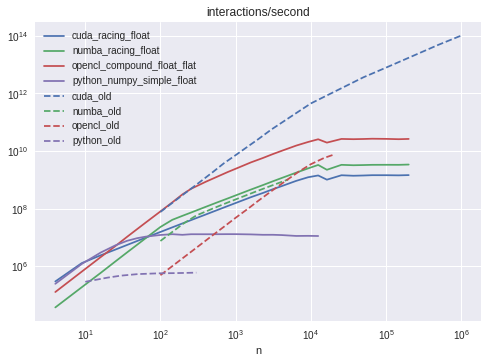

In [117]:
renamed = interesting_times.copy()
renamed.runner[renamed.runner=="numpy_simple_float"]="python_numpy_simple_float"
timeplot(renamed)
timeplot(slide_times, style="--")